# ENPH 213 - Week 2 Lab
In this lab, we will be working with Numerical Integration while continuing to develop your Python skills.

There is an accompanying file (ENPH213_Lab2_Hysteresis-Data.csv) that should be downloaded to the same folder as this notebook.  When you are finished, please rename this notebook to LastName_ENPH213_Lab2, where LastName is your last name.  Submit that file to onQ.

## Part 1
Load the data from "ENPH213_Lab2_Hysteresis-Data.csv", and plot the curve of v$_y$ as a function of v$_x$.  Before you being, open the file in a text editor so that you know the format of the data and can manipulate it properly.

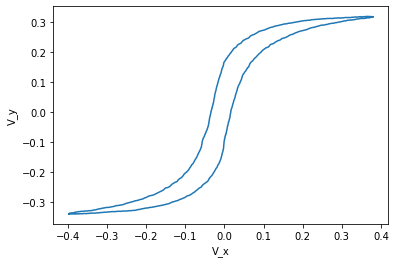

In [1]:
#importing needed libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#import the data from the file, and chop each column into the required array
dataArray = np.loadtxt("ENPH213_Lab2_Hysteresis-Data.csv", delimiter=',', skiprows=3)
dataT = dataArray[:,0]
dataVX = dataArray[:,1]
dataVY = dataArray[:,2]

#plot the data and label the axes
plt.plot(dataVX, dataVY)
plt.ylabel('V_y')
plt.xlabel('V_x')
plt.show()

## Part 2
In the Part 3, you will be asked to find the area between the two curves.  In a few sentences, first indicate what algorithm you would like to use and why.  Then, describe how you will get the area considering how the data is presented.

<b>Here, I have decided to go with Simpson's 1/3 rule, as it simplifies the amount of calculations that the compiler will have to perform on 1200+ data points. In addition, the 1 4 1 weighting makes it very simple to perform a quick calculation on each curve with a for loop of iteration length (len(x)). Finally, Simpson's rule allows me to calculate each area individually, by separating the two curves, and computing the area beneath one by one. </b>

## Part 3
Create a function myIntFunc(x,y) that calculates the area of a hysteresis curve, such as the one you plotted above, where x and y are the input vectors of the x- and y-axes, respectively.  Of note, comment on what form the vectors should take to have the function operate properly.  Have the function output the area. (Hint: my value was in the range 0.04 and 0.05)

In [41]:
#Separate the data into two distinct sections, separated by increasing/decreasing (Point 334)

#X Data
VX1 = dataVX[0:334]
VX2 = dataVX[-1:333:-1]

#Y Data
VY1 = dataVY[0:334]
VY2 = dataVY[-1:333:-1]

#Function to complete the simpsons rule
def myIntFunc(x,y):
    int = 0
    for i in range(0,len(x)-2, 2): #Here, I want to loop through the array, and then leave the last 2 points (increment=2 because of Simpson's)
        #Calculate h value here through an average
        h = (x[i+2]-x[i])*0.5
        #Start the summation using 1 4 1 rule here
        int = int + (y[i]+4*y[i+1]+y[i+2])*(h/3)

    #Return the val
    return int


#To note, this only calculates one of the two pieces at a time, so they need to be called individually
A1 = myIntFunc(VX1, VY1)
A2 = myIntFunc(VX2, VY2)

#Finally, just take an absolute sum here to make sure that the area is positive (absolute makes it so that the area doesn't matter)
finalArea = abs(A1-A2)

print(finalArea)

0.04592247255000008


## Part 4

One interesting function that appears often and exists as a integral function is the Guass Error Function or more commonly simply the Error Function.  It is written as erf(x) and has the form:

$ erf(x) = \frac{2}{\sqrt\pi} \int_0^x e^{-z^2} dz$

Write a function myErf(x, N) using Simpson's 1/3 Rule (itself a separate function) to evaluate the Error Function for an input x and a number of points to evaluate N.  

Then evaluate myErf for x = 0.213, but determine how many points N are needed to be within 0.000 01 of the accepted value (Google calculated this for me: 0.2367589703).

In [2]:
#QUICK NOTE: This thing takes a long time to run (at least on my computer), so if it doesnt spit out numbers right away give it a few seconds...

#Function inside the integral, this is called for simps
def func(x):
    return np.e**(-x**2)

#Simpson's 1/3 function to evaluate an integral of a function (func(x)) with a value N chunks
def simps(z1, z2, N):
    #initiate the integral, and also the universal h value
    int=0
    h =(z2-z1)/N
    
    #loop to check every midpoint zi and fit a quadratic
    for i in range(1,N-1,2):
        zi = z1 + h*i
        int = int + func(zi-h) + 4*func(zi) + func(zi+h)

    #h/3 was factored out, so we need to account for it here
    int = int*(h/3)
    
    #return the value of the integral
    return int

#Function to call in order to get the value for erf(x)
def myErf(x,N):
    return (2/(np.sqrt(np.pi)))*simps(0, x, N)

actualVal = 0.2367589703

#WHILE LOOP TO DETERMINE N VALUE WITHIN ERROR
n=1 #This is a starting value, and will be iterated to find the right N value
while actualVal-myErf(0.213,n) > 0.00001:
    n = n+2 #N needs to be odd here, as it is Simpson's

#Now, the N is set to the right value
print("N: ", n)

#Print the erf value we want
print(myErf(0.213, n))

N:  22969
0.23674897053434665


## Part 5

Using Simpson's Rule, calculate the following double integral:

$ \Omega  = \int_{y=0}^{\pi/2} \int_{x=0}^{\pi} \sqrt{x+y} \sin(x) \cos(y) dx dy $

Using N = 101 points in each direction, my calculation for $\Omega$ was between 2.0 and 3.0.  Aim to do this question using a matrix of weighting coefficients.  Full marks will be given if no loops are used.

In [52]:
#Initialize important boundaries/numbers
N = 101
x1 = 0
x2 = np.pi
y1 = 0
y2 = np.pi/2

#Function being integrated
def func(x,y):
    return np.sqrt(x+y)*np.sin(x)*np.cos(y)

#The two heights
hx = (x2-x1)/(N-1)
hy = (y2-y1)/(N-1)

#Making 101 points in both dimensions
xArray = np.linspace(x1, x2, N)
yArray = np.linspace(y1, y2, N)

#Making each array 2D to be able to multiply it with the weighting array
y2D = np.repeat(yArray[np.newaxis,:], N, 0).transpose()
x2D = np.repeat(xArray[np.newaxis,:], N, 0)

#Making a 1D weighted Array
FirstWeight = np.ones(N)
FirstWeight[1:N:2] = 4
FirstWeight[2:-2:2] = 2

#Using np.outer to create a 2D Weighted Array
weightArray = np.outer(FirstWeight, FirstWeight)

#The formula for 2D Simpsons (As shown in the lecture slides)
int = (hx*hy/9)*np.sum(func(xArray,yArray)*weightArray)
print(int)

2.8700438107223696


## Part 6: See separate notebook

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.